# NumPy
---

> `index`
> + [6 NumPy](#6-NumPy)
> + [7 indexingとslicing](#7-indexingとslicing)
> + [8 行列生成](#8-行列生成)
> + [9 よく使う便利関数](#9-よく使う便利関数)

> `cf.`
> + [データサイエンスのためのPython入門⑥〜はじめてのNumpy〜](https://datawokagaku.com/numpy/)
> + [データサイエンスのためのPython入門⑦〜これだけ知っておけばいいNumPyのindexingとslicing〜](https://datawokagaku.com/numpy_slice/)
> + [データサイエンスのためのPython入門⑧〜NumPyでよく使う行列生成〜](https://datawokagaku.com/numpy_generate/)
> + [データサイエンスのためのPython入門⑨〜NumPyでよく使う便利関数〜](https://datawokagaku.com/numpy_functions/)

---

## <a id='6'>6 NumPy</a>

> ```memo```
> + 科学や数学のための数値計算モジュール
> + Numerical Pythonの略
> + 行列計算が得意、[フーリエ変換](https://www.google.com/search?>q=%E3%83%95%E3%83%BC%E3%83%AA%E3%82%A8%E5%A4%89%E6%8F%9B&oq=hu-rie&aqs=chrome.1.69i57j0i4i433l2j0i4l2j0i4i395l5.2714j1j7&sourceid=chrome&ie=UTF-8)とか乱数の生成にも使える
> + 「世界中のデータサイエンティストがPythonを使う理由はNumpyがあるから」と言っても過言ではないらしい
> + Anacondaディストリビューションに入っている
> + インストールは、```$conda install numpy```  や ```$pip install numpy```

In [1]:
# インポート
import numpy as np

In [2]:
# バージョン確認
np.version.full_version

'1.19.4'

In [3]:
# numpyモジュールの所在確認
np.__file__

'/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/numpy/__init__.py'

### | 行列とはなんぞ？
> 縦と横に数字が羅列したもの(ざっくりw)

```memo```
+ 一般に，線形代数という数学の分野
> cf.[【機械学習のための】数学を勉強するのにおすすめの本とロードマップ【米国データサイエンティスト厳選】](https://datawokagaku.com/math_books/)
([マセマの本](https://www.mathema.jp/)がわかりやすくてお勧め)
+ NumPyはこの「行列」の計算を簡単にしかも高速にできる

#### - ベクトル(Vector)
> 数を一列にならべたもの(ざっくりw)

$
M=
\begin{bmatrix}
1\\
2\\
3
\end{bmatrix}
\
N=
\begin{bmatrix}
1& 2& 3
\end{bmatrix}
$

#### - 行列(Matrix)
$
M=
\begin{bmatrix}
1& 2& 3\\
4& 5& 6\\
7& 8& 9
\end{bmatrix}
$

### | NumPy Arraysを使ってみる

In [4]:
# 普通のPythonのリスト
python_list = [1, 2, 3]
python_list

[1, 2, 3]

In [5]:
# NumPy Arraysのリスト
np_list = np.array([1, 2, 3])
np_list

array([1, 2, 3])

In [6]:
# Pythonで入れ子（ネスト）のリスト
python_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
python_list

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [7]:
# NumPyArraysの行列
np_list = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
np_list

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### | NumPy Arraysの演算

#### - 行列演算 (四則演算)

In [8]:
array1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [9]:
array1 + array2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [10]:
array1 - array2

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [11]:
array1 * array2

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [12]:
array1 / array2

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

#### - broadcast
+ [NumPy - Broadcasting](https://www.tutorialspoint.com/numpy/numpy_broadcasting.htm)

![img](https://datawokagaku.com/wp-content/uploads/2020/01/numpy_broadcast-300x104.png)
>source:https://www.tutorialspoint.com/numpy/numpy_broadcasting.htm

In [13]:
# 行列のサイズが合わない者同士で計算
array1 = np.array([1, 2, 3]) #(1,3)
array2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) #(3,3)

In [14]:
a = array1 + array2
b = array1 - array2
c = array1 * array2
d = array1 / array2
print('{0} \n---\n {1} \n---\n {2} \n---\n {3}'.format(a, b, c, d))

[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]] 
---
 [[ 0  0  0]
 [-3 -3 -3]
 [-6 -6 -6]] 
---
 [[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]] 
---
 [[1.         1.         1.        ]
 [0.25       0.4        0.5       ]
 [0.14285714 0.25       0.33333333]]


In [15]:
# 足りない要素は[1, 2, 3]で自動的に補完されたことの証明

array1 = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]]) #(3,3)
array2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) #(3,3)

a = array1 + array2
b = array1 - array2
c = array1 * array2
d = array1 / array2
print('{0} \n---\n {1} \n---\n {2} \n---\n {3}'.format(a, b, c, d))

[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]] 
---
 [[ 0  0  0]
 [-3 -3 -3]
 [-6 -6 -6]] 
---
 [[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]] 
---
 [[1.         1.         1.        ]
 [0.25       0.4        0.5       ]
 [0.14285714 0.25       0.33333333]]


#### - .shape

In [16]:
array = np.array([[1, 2], [3, 4], [5, 6]])
print(array)
array.shape

[[1 2]
 [3 4]
 [5 6]]


(3, 2)

## 7 indexingとslicing
```memo```
+ NumPyの操作で圧倒的に多いのはこのIndexingとSlicing(さらにいうとslicingが多い)
+ indexingとslicingはデータサイエンスに欠かせない操作
> 実業務では，ぶっちゃけ行列演算ってそんなにしない
> 
> + 自分で数式を作って生のデータをそれにぶっこむとき
> + 例えば深層学習の中間層に自分で行列演算の式を書くとき
>> そういうときはNumPyではなくてNumPyを内部で使ってる別のパッケージを使ったり
+ N次元Arrayのことをndarray(N-dimentional array)

### | Indexing
<img src='https://datawokagaku.com/wp-content/uploads/2020/01/numpy_index_basic-300x211.png' width=25%>

In [17]:
ndarray = np.array([[1, 2], [3, 4], [5, 6]])
ndarray

array([[1, 2],
       [3, 4],
       [5, 6]])

In [18]:
# ●行●列のデータ取得
print(ndarray[1][0])
print(ndarray[1, 0]) #(一般的)

3
3


In [22]:
# 3次元以降の配列(画像処理でよく使われる)
ndarray = np.array([
    [[1,2],[3,4],[5,6]],
    [[7,8],[9,10],[11,12]],
    [[13,14],[15,16],[17,18]]
])
print(ndarray, '\n\n', ndarray.shape)

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]

 [[13 14]
  [15 16]
  [17 18]]] 

 (3, 3, 2)


In [23]:
ndarray[0]

array([[1, 2],
       [3, 4],
       [5, 6]])

In [24]:
ndarray[0, 2]

array([5, 6])

In [25]:
ndarray[0 ,2, 0] #height, width, channel

5

```mame```

３次元なら(height, width, channel)のようにコメントを書いておき，どこの要素にindexすればどの情報が得られるのかわかるようにします．

+ 一般的に白黒画像なら(height, width)
+ カラー画像なら(height, width, channel)
> (channelというのはRed, Green，Blueのようなそれぞれの色のチャネル)

### | Slicing（重要）
<img src='https://datawokagaku.com/wp-content/uploads/2020/01/slicing_basic-768x271.png' width=45%>

[N:M]としたとき，indexが「N以上M未満」の要素をとってきます

```e.g.```
例えば画像のndarrayで、右半分だけ表示するとき
[:, 2/width:]とslicingすると右半分になる。

<img src='https://datawokagaku.com/wp-content/uploads/2020/01/2d_slice.png' width=45%>

In [26]:
array = np.array([
    [1, 2, 3, 4],
    [2, 4, 6, 4],
    [3, 5, 7, 4],
    [3, 5, 7, 4]
])
array

array([[1, 2, 3, 4],
       [2, 4, 6, 4],
       [3, 5, 7, 4],
       [3, 5, 7, 4]])

In [27]:
array[:, 2:] #全行、２列以降

array([[3, 4],
       [6, 4],
       [7, 4],
       [7, 4]])

In [28]:
#（練習）下２段を取得
print(array[2:,])
print(array[2:, :])

[[3 5 7 4]
 [3 5 7 4]]
[[3 5 7 4]
 [3 5 7 4]]


In [29]:
#（練習）右下から４マス取得
array[2:, 2:]

array([[7, 4],
       [7, 4]])

In [30]:
array = np.array([1, 2, 3, 4, 5, 6, 7])
print(array[1:6])
print(array[1:6:2]) #(n:m:L) Lは飛び　＝２個飛ばし

[2 3 4 5 6]
[2 4 6]


```mame```

    他にもややこしいslicingのルールが存在します.
    しかし,本当にややこしすぎてコードを書いている人も理解しにくいものが多く,可読性が低くなるのであまり好まれません!

## <a id='8'>8 行列生成</a>

### | 様々なndarrayを作る

#### - np.arange([start,] stop[, step])
    よく使います．
    start以上stop未満の値をstepずつ増加させた値のarray．
    ちなみに↑の関数の引数の表記で，[]は省略可能を意味します．
    つまり，startとstepは省略可能で，それぞれ0と1がデフォルトで入ります．
    
```memo```

現場活用例：
[閾値](https://ja.wikipedia.org/wiki/%E3%81%97%E3%81%8D%E3%81%84%E5%80%A4)をたくさん用意してその結果がどう変わるか見る場合に`np.arange()`で閾値のリストを作成。


In [31]:
import numpy as np

print(np.arange(5))
print(np.arange(0, 5, 1))

[0 1 2 3 4]
[0 1 2 3 4]


In [32]:
print(np.arange(0, 5, 2))
print(np.arange(0, 5, 0.1))

[0 2 4]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]


#### - np.linspace(start, stop, num=50)
    np.arange()がstepだったのに対し，np.linspace()は要素の数(num)を指定します．
    startからstopまでの値をnum等分した値がarrayで返されます．
    stepを指定したい時はnp.arange()で，
    stepはなんでもいいが特定の数だけほしいという場合はnp.linspace()を使いましょう．(stopの値を含むことに注意しましょう．)

In [33]:
np.linspace(1, 2, 20)

array([1.        , 1.05263158, 1.10526316, 1.15789474, 1.21052632,
       1.26315789, 1.31578947, 1.36842105, 1.42105263, 1.47368421,
       1.52631579, 1.57894737, 1.63157895, 1.68421053, 1.73684211,
       1.78947368, 1.84210526, 1.89473684, 1.94736842, 2.        ])

#### - .copy()
    arrayをコピーします．本当にそれだけです．
    コピーされたarrayは全く別のオブジェクトになります．

```Cf.```
+ [Pythonの変数とオブジェクトID - Qiita](https://qiita.com/inatatsu_csg/items/b953ff8049bd47276778)

In [34]:
ndarray = np.arange(0, 5)
ndarray_copy = ndarray.copy()
print('original arrays value is  {0}, id: {1}.'.format(ndarray, id(ndarray)))
print('copied arrays value is {0}, id: {1}.'.format(ndarray_copy, id(ndarray_copy)))

original arrays value is  [0 1 2 3 4], id: 4814343344.
copied arrays value is [0 1 2 3 4], id: 4544032816.


```memo```

Pythonでは基本`参照渡し`です．
NumPy Arrayはmutableなオブジェクトなので，関数内で変更されると，元の変数にも影響があることに気をつけましょう．
`値渡し`にしたいときに.copy()をよく使います．



##### (番外) 参照渡し、値渡し

In [35]:
# 参照渡しの例
a = 'test'
print('id:', id(a), sep='')

def f(n):
    print('id:', id(n), sep='')
f(a)

id:4475561264
id:4475561264


（結論）同じIDが割り振られている。

    関数f（）にa=’test’の文字列の変数を入れました．
    aと言う変数はid(a)からIDが割り当てられていて，メモリに保存されています．
    f(a)を実行したときに，fの引数parametersにaの情報が渡されるわけですが，このparametersのIDをみても，同じIDが割り当てられている。
    つまり，Pythonでは，関数に引数を渡す際には，値をコピーして渡しているのではなく，
    メモリの参照先(アドレス)を渡している．　これを「参照渡し」といい，逆に値をコピーして渡すやり方を「値渡し」と言います．

##### (番外) mutable, immutable

In [36]:
# mutable immutable の例
str_say = 'Hello'
list_say = ['H', 'e', 'l', 'l', 'o']
print('string: {}'.format(str_say))
print('list: {}'.format(list_say))
print('-'*20)

def add(say):
    say += 'World'
    return say

output1 =add(str_say)
output2 = add(list_say)
print('string: {}'.format(output1))
print('list: {}'.format(output2))
print('-'*20)

print('string: {} \n ∴string is immutable'.format(str_say))
print('list: {} \n ∴list is mutable'.format(list_say))

string: Hello
list: ['H', 'e', 'l', 'l', 'o']
--------------------
string: HelloWorld
list: ['H', 'e', 'l', 'l', 'o', 'W', 'o', 'r', 'l', 'd']
--------------------
string: Hello 
 ∴string is immutable
list: ['H', 'e', 'l', 'l', 'o', 'W', 'o', 'r', 'l', 'd'] 
 ∴list is mutable


    この挙動の違いは，引数に渡しているオブジェクトがimmutableかmutableかの違いにあります．
    (mutableというのは’変わりやすい’, immutableは’不変の’と言う意味)

```mutable(変わりやすい)```
+ list
+ dict
+ set

```immutable(不変の)```
+ str
+ int
+ float
+ bool
+ tapul

##### (番外)NumPy Arrayで初心者がやりがちなこと

    immutableのオブジェクトを引数に渡して関数内でそれを更新する場合は，結局内部でコピーを作るので値渡しのような挙動になります．
    NumPyとかListってたくさんの値を保持することが多いのでデータ量が巨大になりがちです．
    それをいちいちコピーしてたら大変なので参照渡しの挙動になると考えましょう．
    
    以下はNumPy Arrayの例です． .copy() をしないと直接もとの変数を上書きしてしまうので超注意です．

　　　　（初心者がよくやるバグの原因です．以下の例をみてください．）
    
    arrayをそのまま更新している関数(change_100)に対して，
    copyしてから更新している関数(change_100_copy)ではもとのarrayが更新されていないです．
    関数内で直接arrayを更新する時は気をつけましょう．
    メモリに余裕があると思ったら .copy() して値渡しにすることを検討しましょう．


In [37]:
array1 = np.arange(4)
array2 = np.arange(4)
print('original array1 is {}.'.format(array1))
print('original array2 is {}.'.format(array2))
print('-'*20)


def change_100(array):
    array[0] = 100
    return array

def change_100_copy(array):
    array_copy = array.copy()
    array_copy[0] = 100
    return array_copy

output1 = change_100(array1)
output2 = change_100_copy(array2)
print('original array1 is {}.'.format(output1))
print('original array2 is {}.'.format(output2))
print('-'*20)


print('original array1 is {}.'.format(array1))
print('original array2 is {}.'.format(array2))

original array1 is [0 1 2 3].
original array2 is [0 1 2 3].
--------------------
original array1 is [100   1   2   3].
original array2 is [100   1   2   3].
--------------------
original array1 is [100   1   2   3].
original array2 is [0 1 2 3].


#### - np.zeros(shape)

    こちらも頻出です．いわゆる零行列をつくります．要素が全て0のndarrayです. 
    shapeをタプルで渡しましょう． 
    np.zeros(4) など，タプルではなくintegerを入れるとその数文の一列の零行列ができます．( [0, 0, 0, 0] )

```memo```

    あらかじめndarrayの箱を確保したい時に使います．
    一旦零行列作ってから要素を変更していって新たな行列を作るイメージです．

In [38]:
np.zeros(4)

array([0., 0., 0., 0.])

In [39]:
shape = (2, 3, 5)
np.zeros(shape)

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

#### - np.ones(shape)
    np.zerosの「1」版です．全ての要素が「１」になります

In [40]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [41]:
shape = (2, 4, 6)
np.ones(shape)

array([[[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]])

#### - np.eye(N)
    N x Nの単位行列を作ります．単位行列というのは対角成分が全て１となる正方行列です

In [42]:
np.eye(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [43]:
np.eye(3, 5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

#### - np.random.rand()
    0 ~ 1からランダムな数字で行列を作る
    引数に応じて次元を変えられる。

In [44]:
r = np.random.rand()
r_1d = np.random.rand(3)
r_2d = np.random.rand(3, 2)

print('1dimension:\n {0} \n\n {1} \n\n ２dimension:\n {2}'.format(r, r_1d, r_2d))

1dimension:
 0.9285161292946963 

 [0.39101424 0.4682922  0.91748291] 

 ２dimension:
 [[0.75921134 0.92343746]
 [0.36242581 0.92638888]
 [0.96846867 0.92211225]]


#### - np.random.randn()
    標準正規分布(平均0, 分散1の正規分布)から値が返されます．

In [45]:
r = np.random.randn()
r_1d = np.random.randn(3)
r_2d = np.random.randn(3, 2)

print('1dimension:\n {0} \n\n {1} \n\n ２dimension:\n {2}'.format(r, r_1d, r_2d))

1dimension:
 -1.0869648816813744 

 [ 0.167181   -1.12524447 -0.54514521] 

 ２dimension:
 [[-1.12139375 -0.35171944]
 [-1.63890756 -0.41897869]
 [ 1.12866453  0.57984097]]


#### - np.random.randint(low[, high] [, size])
    ランダム系で一番使うかもしれません．
    low以上hight未満のintegerからランダムに，指定したsizeのndarrayを返します．(sizeを指定しなかった場合はintegerを返す)

In [46]:
np.random.randint(10, 50, size=(2, 4, 3))

array([[[11, 18, 26],
        [21, 24, 11],
        [40, 46, 20],
        [37, 30, 28]],

       [[48, 11, 44],
        [26, 44, 48],
        [40, 36, 45],
        [38, 30, 26]]])

#### - .reshape(shape)
    超超超頻出です．あるndarrayのshapeを任意のshapeに変換(reshape)します
    .reshape()によりもとのarrayは更新されません．
    新しいarrayが返されることに注意しましょう．

In [47]:
array = np.arange(0, 10, 1)
print('array:\n {}'.format(array))

array:
 [0 1 2 3 4 5 6 7 8 9]


In [48]:
new_shape = (2, 5)
reshape = array.reshape(new_shape)
print('reshape:\n {}'.format(reshape))

print('array:\n {}'.format(array))

reshape:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
array:
 [0 1 2 3 4 5 6 7 8 9]


## 9 よく使う便利関数

### | 要素の統計量
```
統計量というのは，最大値，最小値，平均，中央値，標準偏差などデータの特徴を要約した値
```

※np.関数名(ndarray)で呼ぶことも可能

In [49]:
import numpy as np
normal_dist_mat = np.random.randn(5, 5)
print(normal_dist_mat)

[[-0.69457227  1.0184266  -0.35750004 -1.80940203 -0.93799836]
 [-0.33148261 -0.66684205 -0.99483612  0.10091278 -0.36002518]
 [ 1.9319737  -2.5377136   0.15390527 -0.46785817 -0.08820117]
 [ 0.72780215  0.12499383  0.97660168 -2.24887286  1.16276281]
 [-0.58037495 -0.90417196  0.27504885 -0.20931303 -2.27514021]]


#### - .max() .argmax()

In [50]:
#max 最大値を求める
print('max is', normal_dist_mat.max())
print('max is', np.max(normal_dist_mat))

max is 1.931973699674396
max is 1.931973699674396


In [51]:
#argmax 
print('argmax is', normal_dist_mat.argmax())
print('argmax is', np.argmax(normal_dist_mat))

argmax is 10
argmax is 10


In [52]:
#(余談)flatten 一列にできる
flat = normal_dist_mat.flatten()
print(flat.shape, '\n', flat, '\n', 'max is', flat[2])

(25,) 
 [-0.69457227  1.0184266  -0.35750004 -1.80940203 -0.93799836 -0.33148261
 -0.66684205 -0.99483612  0.10091278 -0.36002518  1.9319737  -2.5377136
  0.15390527 -0.46785817 -0.08820117  0.72780215  0.12499383  0.97660168
 -2.24887286  1.16276281 -0.58037495 -0.90417196  0.27504885 -0.20931303
 -2.27514021] 
 max is -0.3575000443046745


#### - .min() .argmin()

In [53]:
#min
print('min is', normal_dist_mat.min())

min is -2.537713598561825


In [54]:
#argmin
print('argmin is', normal_dist_mat.argmin())

argmin is 11


#### - .mean()

In [55]:
#mean 平均値取得
print('mean is', normal_dist_mat.mean())

mean is -0.3596750776223567


#### - np.median(ndarray)
npから呼び出すことに注意

In [57]:
#median 中央値
print('median is', np.median(normal_dist_mat))
print('median is', normal_dist_mat.median) #npから呼び出さないと動かない

median is -0.3575000443046745


AttributeError: 'numpy.ndarray' object has no attribute 'median'

#### - .std()

In [58]:
#std 標準偏差：standard deviation
print('std is', normal_dist_mat.std())

std is 1.0776379269161431


**標準偏差(standard deviation)**
>標準偏差というのは，データの分散(ばらつき)を示す指標です．よく記号で𝜎(シグマ)や𝑠で表します．よく略してstdと言う
>
> cf.[【Pythonで学ぶ】絶対にわかる分散と標準偏差(超重要)【データサイエンス入門:統計編⑤】](https://datawokagaku.com/var_std/)


**68-95-99.7ルール**
> （正規分布では）平均から±1標準偏差には約68%のデータが，平均から±2標準偏差には約95%のデータが，平均から±3標準偏差には約99%のデータが，含まれるという経験則
>
> Cf.[【Pythonで学ぶ】標準偏差から散らばり具合をどう読み取る？【データサイエンス入門:統計編⑧】](https://datawokagaku.com/std_distribution/)

<img src='https://datawokagaku.com/wp-content/uploads/2020/01/std_rule.png' width=35%>

標準正規分布というのは平均0，分散1(標準偏差は分散の平方根なので標準偏差も1)の正規分布
本来meanとstdは0と1に近い,２５個(5×５)程度のサンプリングでは元の特徴を表すには少ないことが分かる。

#### - 引数axis
>特定の行，列での統計量を求めたい
+ axis=0を指定すると各列の統計量
+ axis=1を指定すると各行の統計量

In [60]:
print(normal_dist_mat, '\n')
print('axis=0 各列最大値 > {}'.format(normal_dist_mat.max(axis=0)))
print('axis=1 各行最大値 > {}'.format(normal_dist_mat.max(axis=1)))

[[-0.69457227  1.0184266  -0.35750004 -1.80940203 -0.93799836]
 [-0.33148261 -0.66684205 -0.99483612  0.10091278 -0.36002518]
 [ 1.9319737  -2.5377136   0.15390527 -0.46785817 -0.08820117]
 [ 0.72780215  0.12499383  0.97660168 -2.24887286  1.16276281]
 [-0.58037495 -0.90417196  0.27504885 -0.20931303 -2.27514021]] 

axis=0 各列最大値 > [1.9319737  1.0184266  0.97660168 0.10091278 1.16276281]
axis=1 各行最大値 > [1.0184266  0.10091278 1.9319737  1.16276281 0.27504885]


### | 数学でよく使う関数

#### - np.exp(ndarray)
> 指数関数(exponential function)
> + NumPyではネイピア数e(約2.718)の指数関数

In [61]:
ndarray = np.linspace(-3, 3, 10)

In [62]:
expndarray = np.exp(ndarray)
print('{0} \n {1}'.format(ndarray, expndarray))

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ] 
 [ 0.04978707  0.09697197  0.1888756   0.36787944  0.71653131  1.39561243
  2.71828183  5.29449005 10.3122585  20.08553692]


<function matplotlib.pyplot.show(close=None, block=None)>

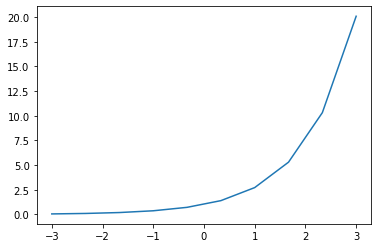

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ndarray, expndarray)
plt.show

#### - np.log(ndarray)
> 負の数は対数を取れないのでnan

In [64]:
logndarray = np.log(ndarray)
print('{0} \n {1}'.format(ndarray, logndarray))

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ] 
 [        nan         nan         nan         nan         nan -1.09861229
  0.          0.51082562  0.84729786  1.09861229]


<ipython-input-64-475293300e96>:1: RuntimeWarning: invalid value encountered in log
  logndarray = np.log(ndarray)


<function matplotlib.pyplot.show(close=None, block=None)>

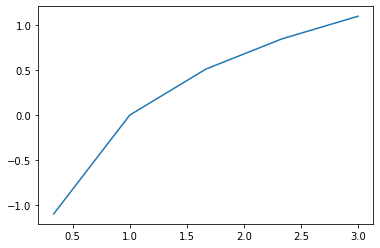

In [65]:
plt.plot(ndarray, logndarray)
plt.show

#### - np.nan, np.isnan()
> nan = Not-A-Number
>+ NumPy演算で例えば0で割ったりすると出てきます．
>+ PythonのNoneとは別物

In [66]:
print(logndarray[0])

nan


In [72]:
print('nan == None?:{}'.format(logndarray[0] is None))

nan == None?:False


In [73]:
np.isnan(logndarray[0])

True

#### - np.e
> ネイピア数(2.7182….)

In [74]:
e = np.e
print(e)
print(np.log(e))

2.718281828459045
1.0


### | ndarrayのshape操作
> **rank:次元の数**
>
> rank 2
> >(3,3)
>
>rank 3
>> (3,3,1)
>
> いずれも同じ行列を意味する。

In [78]:
ndarray = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('array is:\n{}'.format(ndarray))
print("ndarray's shape is:{}".format(ndarray.shape))

array is:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
ndarray's shape is:(3, 3)


#### -np.expand_dims(ndarray, axis)
>**rankを一つ追加**
>+ axis=0:一つ目の次元を追加
>+ axis=-1:最後の次元を追加

In [79]:
expanded_ndarray = np.expand_dims(ndarray, axis=0)
print('array is:\n{}'.format(expanded_ndarray))
print("ndarray's shape is:{}".format(expanded_ndarray.shape))

array is:
[[[1 2 3]
  [4 5 6]
  [7 8 9]]]
ndarray's shape is:(1, 3, 3)


In [81]:
expanded_ndarray = np.expand_dims(ndarray, axis=2)
print('array is:\n{}'.format(expanded_ndarray))
print("ndarray's shape is:{}".format(expanded_ndarray.shape))

array is:
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]

 [[7]
  [8]
  [9]]]
ndarray's shape is:(3, 3, 1)


#### - np.squeeze(ndarray)
> squeeze(絞る)するイメージ

In [82]:
squeezed_expanded_ndarray = np.squeeze(expanded_ndarray)
print('array is:\n{}'.format(squeezed_expanded_ndarray))
print("ndarray's shape is:\n{}".format(squeezed_expanded_ndarray.shape))

array is:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
ndarray's shape is:
(3, 3)


#### - .flatten()
>ndarrayを一列にします．行列構造を持つ必要がなくなったりしたら使います．
(もとのndarrayは変更されないことに注意)

In [83]:
flatten_array = ndarray.flatten()
print('flatten_array:\n{}'.format(flatten_array))
print('ndarray:\n{}'.format(ndarray))

flatten_array:
[1 2 3 4 5 6 7 8 9]
ndarray:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### - ravel()

In [11]:
import numpy as np
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # (3, 3)
B = A.ravel() #次元短縮 (1,9)
# A[0, :] = 0
B

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### | NumPyArray 保存＆読込

#### - np.save(‘path’, ndarray)

In [84]:
ndarray = np.array([
    [1, 2, 3, 4],
    [10, 20, 30, 40],
    [100, 200, 300, 400],
])
np.save('saved_numpy', ndarray) #拡張子.npyを書いてもOK

#### - np.load(‘path’)

In [85]:
loaded_numpy = np.load('saved_numpy.npy')
loaded_numpy

array([[  1,   2,   3,   4],
       [ 10,  20,  30,  40],
       [100, 200, 300, 400]])